In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('C:\\Users\\Daniele\\Desktop\\Homework 5\\USA-road-d.CAL.gr.gz', compression='gzip', header=0, sep=',', quotechar='"')

In [6]:
df = df[6:]

In [7]:
df.rename(columns = {'c 9th DIMACS Implementation Challenge: Shortest Paths':'arc'},inplace = True)

In [8]:
list_df = df.values.tolist()

In [9]:
lis_df = []
for i in list_df:
    lis_df.append(list(map(int,(i[0].split())[1:])))

In [10]:
from collections import defaultdict

tree = defaultdict(list)
weight = defaultdict(list)

graph = lis_df

for i in range(len(lis_df)):
    id_node1 = graph[i][0]
    id_node2 = graph[i][1]
    w =graph[i][2] 
    
    tree[id_node1].append(id_node2)
    
    w_k = str(id_node1) +',' +(str(id_node2))
    weight[w_k].append(w)
    

In [11]:
lis_df

[[1, 1048577, 456],
 [1048577, 1, 456],
 [2, 1048578, 2389],
 [1048578, 2, 2389],
 [3, 1048579, 358],
 [1048579, 3, 358],
 [4, 1048579, 14901],
 [1048579, 4, 14901],
 [5, 6, 18133],
 [6, 5, 18133],
 [7, 1048580, 2463],
 [1048580, 7, 2463],
 [8, 1048581, 14944],
 [1048581, 8, 14944],
 [9, 1048583, 10049],
 [1048583, 9, 10049],
 [1048583, 10, 4462],
 [10, 1048583, 4462],
 [10, 1048584, 2630],
 [1048584, 10, 2630],
 [1048584, 11, 2041],
 [11, 1048584, 2041],
 [12, 1048585, 7589],
 [1048585, 12, 7589],
 [13, 1048586, 7736],
 [1048586, 13, 7736],
 [1048587, 14, 29679],
 [14, 1048587, 29679],
 [1048588, 1048587, 1140],
 [1048587, 1048588, 1140],
 [15, 1048588, 15126],
 [1048588, 15, 15126],
 [14, 1048589, 10878],
 [1048589, 14, 10878],
 [16, 1048590, 28270],
 [1048590, 16, 28270],
 [16, 17, 11926],
 [17, 16, 11926],
 [1048591, 18, 873],
 [18, 1048591, 873],
 [18, 19, 36280],
 [19, 18, 36280],
 [19, 20, 27402],
 [20, 19, 27402],
 [20, 21, 34363],
 [21, 20, 34363],
 [1048592, 22, 3850],
 [22, 

In [12]:
tree

defaultdict(list,
            {1: [1048577, 1803],
             1048577: [1, 1766, 1767],
             2: [1048578, 1050174, 2462],
             1048578: [2, 1990, 1991],
             3: [1048579, 1049931],
             1048579: [3, 4, 1766],
             4: [1048579, 1049993, 1820],
             5: [6, 2244, 1048581],
             6: [5, 1050368],
             7: [1048580, 1048729, 194],
             1048580: [7, 1048727],
             8: [1048581, 1050376],
             1048581: [8, 5],
             9: [1048583],
             1048583: [9, 10],
             10: [1048583, 1048584, 2257],
             1048584: [10, 11],
             11: [1048584],
             12: [1048585, 13],
             1048585: [12, 1049414, 1043, 1153],
             13: [1048586, 12, 756],
             1048586: [13, 2544, 1050619],
             1048587: [14, 1048588, 1048717],
             14: [1048587, 1048589, 18],
             1048588: [1048587, 15, 1048602],
             15: [1048588],
             1048589: [

In [13]:
weight

defaultdict(list,
            {'1,1048577': [456],
             '1048577,1': [456],
             '2,1048578': [2389],
             '1048578,2': [2389],
             '3,1048579': [358],
             '1048579,3': [358],
             '4,1048579': [14901],
             '1048579,4': [14901],
             '5,6': [18133],
             '6,5': [18133],
             '7,1048580': [2463],
             '1048580,7': [2463],
             '8,1048581': [14944],
             '1048581,8': [14944],
             '9,1048583': [10049],
             '1048583,9': [10049],
             '1048583,10': [4462],
             '10,1048583': [4462],
             '10,1048584': [2630],
             '1048584,10': [2630],
             '1048584,11': [2041],
             '11,1048584': [2041],
             '12,1048585': [7589],
             '1048585,12': [7589],
             '13,1048586': [7736],
             '1048586,13': [7736],
             '1048587,14': [29679],
             '14,1048587': [29679],
             '1048588,10

In [18]:
def bfs(graph,v,weight,k):
    distance = {}
    for item in tree.keys():
        distance[item] = np.inf
    distance[v] = 0
    queue, output = [],[]
    queue.append(v)
    output.append(v)
    connection = []

    while queue:
        v = queue[0]
        queue.pop(0)
        for u in tree[v]:
            w_k = str(v)+','+str(u)
            if len(weight[w_k])>0:
                if distance[u] > distance[v] + weight[w_k][0]:
                    distance[u] = distance[v] + weight[w_k][0]
                    if distance[u] != np.inf and distance[u] <= k:
                        queue.append(u)
                        output.append(u)
                        connection.append(w_k)
                    
    return output,connection

In [22]:
result = bfs(tree,5,weight,10000)

In [23]:
result[0]

[5, 2244, 1048581, 1050375]

In [24]:
conn = result[1]

In [25]:
conn

['5,2244', '5,1048581', '2244,1050375']

In [20]:
import networkx as nx

In [21]:
G = nx.Graph()

In [36]:
for i in conn:
    j = list(map(int,(i.split(','))))
    G.add_node(j[0])
    G.add_node(j[1])
    G.add_edge(j[0], j[1], weight = weight[i][0])
    
    

In [42]:
import matplotlib.pyplot as plt 

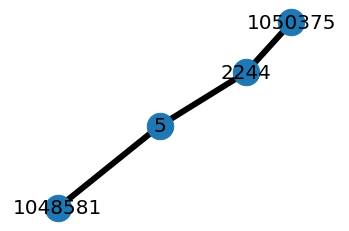

In [46]:
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=6)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()